In [1]:
pip install -e custom_envs 

Obtaining file:///C:/Users/HP/Desktop/Assignment-1/CS698R-ARCHI-GUPTA-21111014-ASSIGN-1-main/CS698R-ARCHI-GUPTA-21111014-ASSIGN-1-main/custom_envs
  Attempting uninstall: my-envs
    Found existing installation: my-envs 0.0.1
    Uninstalling my-envs-0.0.1:
      Successfully uninstalled my-envs-0.0.1
  Running setup.py develop for my-envs
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

## Function for testing env
it calculates the average reward per action over a range of episodes

we test the env by checking the convergence of average reward per action (which should be [1-alpha, beta] in bernoulli bandit and means of respective arms in gaussian bandit)

In [3]:
rng=np.random.default_rng(12345)

def test_env(env, episodes):
  net_reward= np.zeros(len(env.action_space))
  count = np.zeros(len(env.action_space))
  for i in range(episodes):
    env.reset()
    action = rng.choice(env.action_space)
    reward = env.step(action)
    net_reward[action] += reward
    count[action] +=1
  for i in env.action_space:
    if count[i]==0: continue
    net_reward[i] /= count[i]
  return net_reward



## 2 Armed Bernoulli Bandit

In [4]:

EPISODES= [10,100,1000]


bandit = gym.make('my_envs:bernoulli-bandit-v0',alpha=0.7,beta=0.3,seed=1234)
print(bandit)
for e in EPISODES:
    print(e, test_env(bandit, e))
    
bandit = gym.make('my_envs:bernoulli-bandit-v0',alpha=1,beta=0,seed=123)
print(bandit)
for e in EPISODES:
    print(e, test_env(bandit, e))

bandit = gym.make('my_envs:bernoulli-bandit-v0',alpha=0,beta=1,seed=12)
print(bandit)
for e in EPISODES:
    print(e, test_env(bandit, e))

bandit = gym.make('my_envs:bernoulli-bandit-v0',alpha=0,beta=0,seed=1)
print(bandit)
for e in EPISODES:
    print(e, test_env(bandit, e))


2 armed Bernoulli Bandit 
 Alpha:0.7 Beta:0.3
10 [0.  0.5]
100 [0.26415094 0.36170213]
1000 [0.32950192 0.25104603]
2 armed Bernoulli Bandit 
 Alpha:1 Beta:0
10 [0. 0.]
100 [0. 0.]
1000 [0. 0.]
2 armed Bernoulli Bandit 
 Alpha:0 Beta:1
10 [1. 1.]
100 [1. 1.]
1000 [1. 1.]
2 armed Bernoulli Bandit 
 Alpha:0 Beta:0
10 [1. 0.]
100 [1. 0.]
1000 [1. 0.]


## 10 Armed Gaussian Bandit

In [5]:
bandit = gym.make('my_envs:gaussian-bandit-v0',seed=0)
print(bandit)
for e in EPISODES:
    print(e)
    print(test_env(bandit, e))

10 armed Gaussian Bandit with rewards: 
[ 0.12573022 -0.13210486  0.64042265  0.10490012 -0.53566937  0.36159505
  1.30400005  0.94708096 -0.70373524 -1.26542147]
10
[ 0.00000000e+00  2.79525673e-01 -3.48666501e-01  1.14741349e+00
 -1.15894384e+00  1.81145386e-03  0.00000000e+00  9.88406942e-01
 -3.02876601e+00  0.00000000e+00]
100
[ 0.37390619  0.46960382  0.8250899  -0.17660399 -0.7416881   0.15254334
  1.3768537   1.16887301 -0.69848052 -0.37712301]
1000
[-0.01031407 -0.24599377  0.57097619  0.01105236 -0.70325159  0.44521131
  1.28882248  0.98614777 -0.62820875 -1.37039776]


## Implementing RL Strategies
Each of the strategies are returning 3 outputs - ```Q-values, action , reward``` -  for all episodes


#### Pure Exploitation strategy

In [130]:

def PureExploitation(env, EPISODES):
  Q = np.zeros(len(env.action_space))
  count = np.zeros(len(env.action_space))
  Q_est = np.zeros((EPISODES, len(env.action_space)))
  actions = np.zeros(EPISODES)
  rewards = np.zeros(EPISODES)

  for e in range(EPISODES):
    env.reset()
    if e==0:
      action = np.random.choice(env.action_space)
    else: 
      action = np.argmax(Q)
    reward = env.step(action)
    #print(action)
    count[action]+=1
    Q[action] += (reward - Q[action])/count[action]
    actions[e] = action
    rewards[e] = reward
    Q_est[e] = Q

  return Q_est, actions, rewards


#### Pure Exploration strategy

In [131]:

def PureExploration(env, EPISODES):
  Q = np.zeros(len(env.action_space))
  count = np.zeros(len(env.action_space))
  Q_est = np.zeros((EPISODES, len(env.action_space)))
  actions = np.zeros(EPISODES)
  rewards = np.zeros(EPISODES)

  for e in range(EPISODES):
    env.reset()
    action = np.random.choice(env.action_space)
    reward = env.step(action)
    count[action]+=1
    Q[action] += (reward - Q[action])/count[action]
    actions[e] = action
    rewards[e] = reward
    Q_est[e] = Q
    
  return Q_est, actions, rewards


#### Epsilon-Greedy strategy


In [132]:

def EpsilonGreedy(env, EPISODES, epsilon=0.1):
  Q = np.zeros(len(env.action_space))
  count = np.zeros(len(env.action_space))
  Q_est = np.zeros((EPISODES, len(env.action_space)))
  actions = np.zeros(EPISODES)
  rewards = np.zeros(EPISODES)

  for e in range(EPISODES):
    env.reset()
    if epsilon < np.random.rand() and e>0:
      action = np.argmax(Q)
    else: 
      action = np.random.choice(env.action_space)
    reward = env.step(action)
    count[action]+=1
    Q[action] += (reward - Q[action])/count[action]
    actions[e] = action
    rewards[e] = reward
    Q_est[e] = Q
    
  return Q_est, actions, rewards


Decay function with an example

500


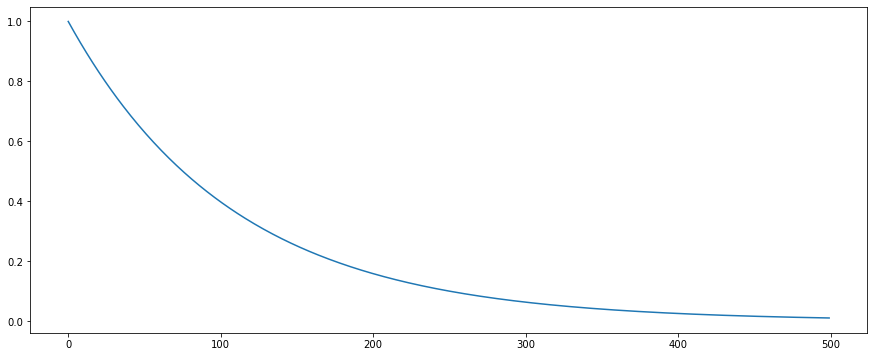

In [133]:
def decay(initial, final, EPISODES, type):
  if type=='linear':
    m = (final - initial)/(EPISODES-1)
    return np.arange(initial, final+m, m)
  if type=='exponential':
    k = math.log(final/initial)/(EPISODES-1)
    f = lambda x: initial*(math.exp(k)**x)
    return f(np.arange(EPISODES))

ex = decay(1,0.01,500,'exponential')
plt.plot(ex)
print(len(ex))

#### Decaying Epsilon-Greedy strategy

In [134]:

def EpsilonDecay(env, EPISODES, initial=1, final=0.01, type ='linear'):
  Q = np.zeros(len(env.action_space))
  count = np.zeros(len(env.action_space))
  Q_est = np.zeros((EPISODES, len(env.action_space)))
  actions = np.zeros(EPISODES)
  rewards = np.zeros(EPISODES)
  epsilon = decay(initial, final, EPISODES, type)
  
  for e in range(EPISODES):
    env.reset()
    if epsilon[e] < np.random.rand() and e>0:
      action = np.argmax(Q)
    else: 
      action = np.random.choice(env.action_space)
    reward = env.step(action)
    count[action]+=1
    Q[action] += (reward - Q[action])/count[action]
    Q_est[e] = Q
    actions[e]=action
    rewards[e] = reward
    
  return Q_est, actions, rewards


#### Softmax Strategy

In [135]:

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def SoftmaxStrategy(env, EPISODES, initial=100, final=0.1, type ='linear'):
  Q = np.zeros(len(env.action_space))
  count = np.zeros(len(env.action_space))
  Q_est = np.zeros((EPISODES, len(env.action_space)))
  actions = np.zeros(EPISODES)
  rewards = np.zeros(EPISODES)
  tau = decay(initial, final, EPISODES, type)
  
  for e in range(EPISODES):
    env.reset()
    probs  = softmax(Q/tau[e])
    action =  np.random.choice(env.action_space,1,p=probs)
    reward = env.step(action)
    count[action]+=1
    Q[action] += (reward - Q[action])/count[action]
    Q_est[e] = Q
    actions[e]=action
    rewards[e] = reward
    
  return Q_est, actions, rewards

#### UCB Strategy

In [136]:

def UCB(env, EPISODES, c=0.5):
  Q = np.zeros(len(env.action_space))
  count = np.zeros(len(env.action_space))
  Q_est = np.zeros((EPISODES, len(env.action_space)))
  actions = np.zeros(EPISODES)
  rewards = np.zeros(EPISODES)
  
  for e in range(EPISODES):
    env.reset()
    if e < len(Q) : action = e
    else:
        U = c*np.sqrt(math.log(e)/count)
        action = np.argmax(Q+U)
    reward = env.step(action)
    count[action]+=1
    Q[action] += (reward - Q[action])/count[action]
    Q_est[e] = Q
    actions[e]=action
    rewards[e] = reward
    
  return Q_est, actions, rewards


## Experimentation

In [155]:
env = gym.make('my_envs:bernoulli-bandit-v0',alpha=0.7,beta=0.7,seed=1234)

np.random.seed(0)

Q_exploit= PureExploitation (env, 500)[0]
Q_explore = PureExploration (env, 500)[0]
Q_epsilon1 = EpsilonGreedy(env, 500, 0.1)[0]
Q_epsilon2 = EpsilonGreedy(env, 500, 0.01)[0]
Q_epsdecay_linear = EpsilonDecay(env,500)[0]
Q_epsdecay_exp = EpsilonDecay(env,500,1,0.01,'exponential')[0]
Q_soft_linear = SoftmaxStrategy(env,500)[0]
Q_soft_exp = SoftmaxStrategy(env,500,1,0.01,'exponential')[0]
Q_ucb1 = UCB(env,500,1000)[0]
Q_ucb2 = UCB(env,500,0.001)[0]
Q_ucb3 = UCB(env,500,5)[0]

#### Pure Exploitation results

final values :  [0.3 0. ]


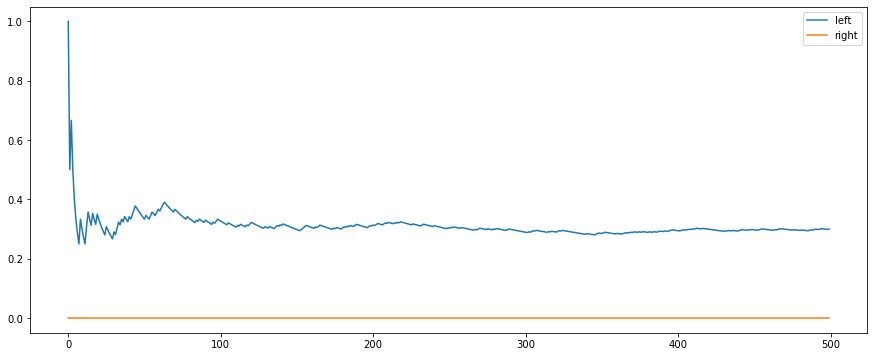

In [156]:
print('final values : ',Q_exploit[-1])
plt.plot(Q_exploit[:,0])
plt.plot(Q_exploit[:,1])
plt.legend(['left','right'])

#### Pure Exploration results

final values :  [0.32067511 0.74904943]


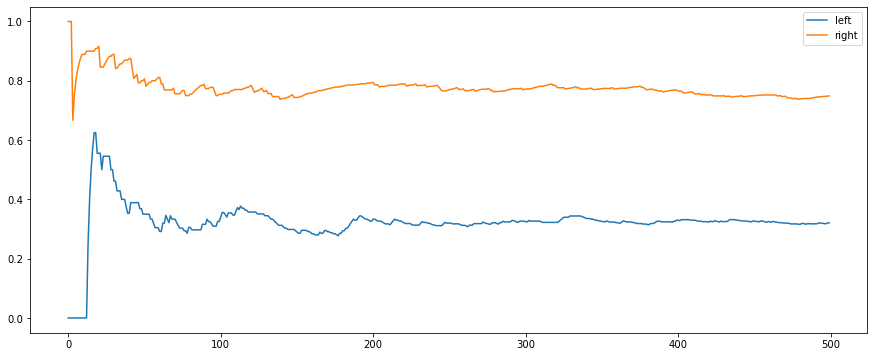

In [157]:
print('final values : ',Q_explore[-1])
plt.plot(Q_explore[:,0])
plt.plot(Q_explore[:,1])
plt.legend(['left','right'])

#### Epsilon-Greedy results

final values :  [0.37837838 0.72138229]
final values :  [0.30348259 0.67892977]


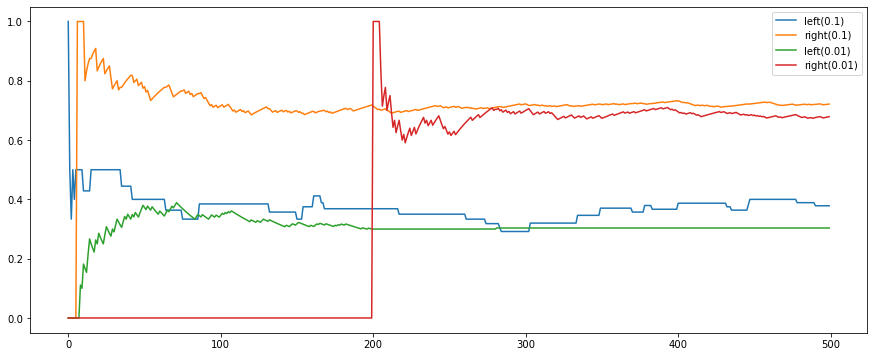

In [158]:
print('final values : ',Q_epsilon1[-1])
print('final values : ',Q_epsilon2[-1])

plt.plot(Q_epsilon1[:,0])
plt.plot(Q_epsilon1[:,1])
plt.plot(Q_epsilon2[:,0])
plt.plot(Q_epsilon2[:,1])
plt.legend(['left(0.1)','right(0.1)','left(0.01)','right(0.01)'])

#### Decating epsilon-greedy results with different decaying epsilon

final values (linear decay) :  [0.33035714 0.70103093]
final values (exponential decay) :  [0.30434783 0.74669604]


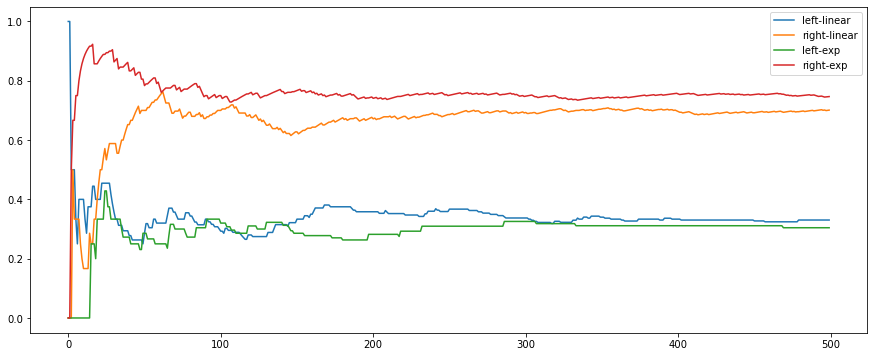

In [159]:
print('final values (linear decay) : ',Q_epsdecay_linear[-1])
print('final values (exponential decay) : ',Q_epsdecay_exp[-1])

plt.plot(Q_epsdecay_linear[:,0])
plt.plot(Q_epsdecay_linear[:,1])
plt.plot(Q_epsdecay_exp[:,0])
plt.plot(Q_epsdecay_exp[:,1])
plt.legend(['left-linear','right-linear','left-exp', 'right-exp'])

#### Softmax strategy results with different decating temperatures

final values (linear decay) :  [0.30327869 0.72265625]
final values (exponential decay) :  [0.30769231 0.70535714]


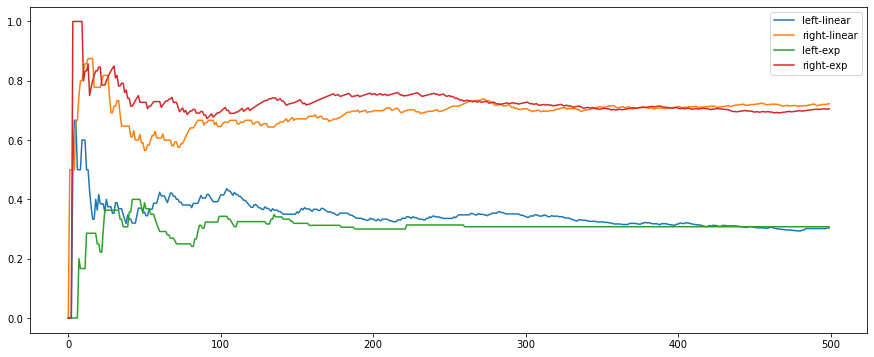

In [160]:
print('final values (linear decay) : ',Q_soft_linear[-1])
print('final values (exponential decay) : ',Q_soft_exp[-1])

plt.plot(Q_soft_linear[:,0])
plt.plot(Q_soft_linear[:,1])
plt.plot(Q_soft_exp[:,0])
plt.plot(Q_soft_exp[:,1])
plt.legend(['left-linear','right-linear','left-exp', 'right-exp'])

#### UCB strategy with different c

final values (c=1000) :  [0.27710843 0.68924303]
final values (c=0.001) :  [0.         0.69338677]
final values (c=5) :  [0.27205882 0.69230769]


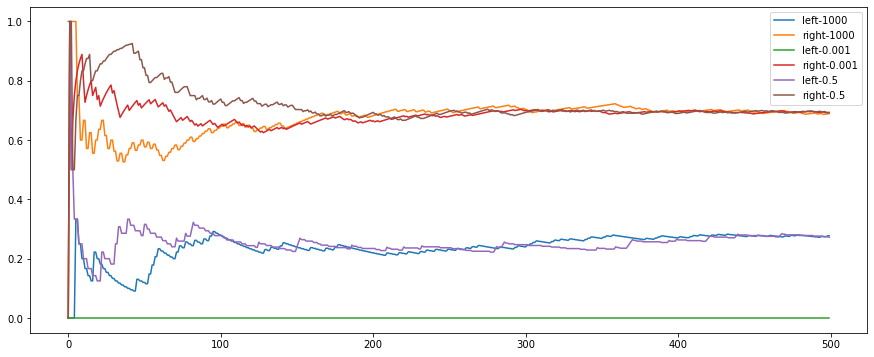

In [161]:
print('final values (c=1000) : ',Q_ucb1[-1])
print('final values (c=0.001) : ',Q_ucb2[-1])
print('final values (c=5) : ',Q_ucb3[-1])

plt.plot(Q_ucb1[:,0])
plt.plot(Q_ucb1[:,1])
plt.plot(Q_ucb2[:,0])
plt.plot(Q_ucb2[:,1])
plt.plot(Q_ucb3[:,0])
plt.plot(Q_ucb3[:,1])
plt.legend(['left-1000','right-1000','left-0.001', 'right-0.001','left-0.5', 'right-0.5'])

## Q4 and Q5

In [174]:
np.random.seed(0)

bb_envs=[]
alphas = np.random.uniform(0,1,50)
betas = np.random.uniform(0,1,50)
seeds = np.random.choice(500, size=50)
for i in range(50):
    bb_envs.append(gym.make('my_envs:bernoulli-bandit-v0',alpha=alphas[i],beta=betas[i],seed=seeds[i]))

In [ ]:
np.random.seed(0)

gb_envs=[]
seeds = np.random.choice(500, size=50)
for i in range(50):
    gb_envs.append(gym.make('my_envs:gaussian-bandit-v0',seed=seeds[i]))

#### bernoulli bandits

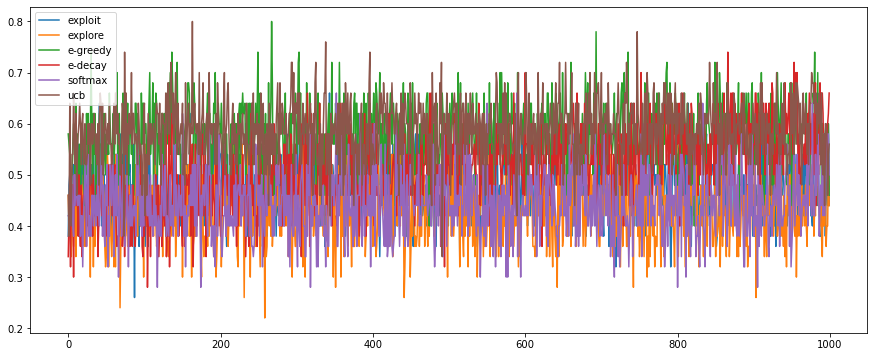

In [175]:
EPISODES=1000
R_exploit = np.zeros(EPISODES)
R_explore = np.zeros(EPISODES)
R_epsilon = np.zeros(EPISODES)
R_epsdecay = np.zeros(EPISODES)
R_soft = np.zeros(EPISODES)
R_ucb = np.zeros(EPISODES)
for i in range(50):
    R_exploit += PureExploitation(bb_envs[i],EPISODES)[2]
    R_explore += PureExploration(bb_envs[i],EPISODES)[2]
    R_epsilon += EpsilonGreedy(bb_envs[i],EPISODES)[2]
    R_epsdecay += EpsilonDecay(bb_envs[i],EPISODES)[2]
    R_soft += SoftmaxStrategy(bb_envs[i],EPISODES)[2]
    R_ucb += UCB(bb_envs[i],EPISODES)[2]
R_exploit /= 50
R_explore /= 50
R_epsilon /= 50
R_epsdecay /= 50
R_soft /= 50
R_ucb /= 50
plt.plot(R_exploit)
plt.plot(R_explore)
plt.plot(R_epsilon)
plt.plot(R_epsdecay)
plt.plot(R_soft)
plt.plot(R_ucb)
plt.legend(['exploit','explore','e-greedy', 'e-decay','softmax', 'ucb'])


#### gaussian bandits

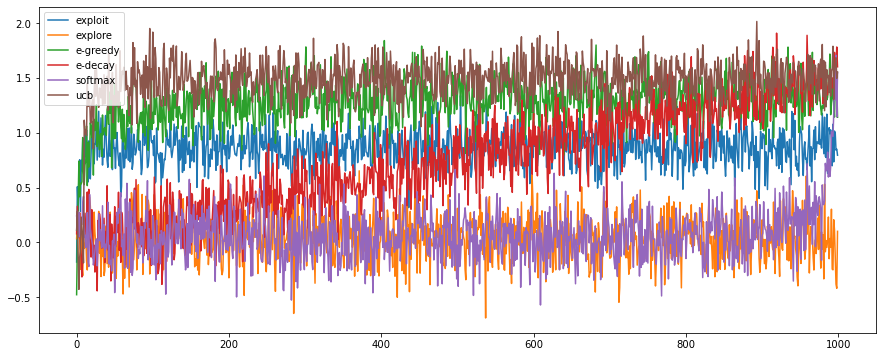

In [177]:
EPISODES=1000
R_exploit = np.zeros(EPISODES)
R_explore = np.zeros(EPISODES)
R_epsilon = np.zeros(EPISODES)
R_epsdecay = np.zeros(EPISODES)
R_soft = np.zeros(EPISODES)
R_ucb = np.zeros(EPISODES)
for i in range(50):
    R_exploit += PureExploitation(gb_envs[i],EPISODES)[2]
    R_explore += PureExploration(gb_envs[i],EPISODES)[2]
    R_epsilon += EpsilonGreedy(gb_envs[i],EPISODES)[2]
    R_epsdecay += EpsilonDecay(gb_envs[i],EPISODES)[2]
    R_soft += SoftmaxStrategy(gb_envs[i],EPISODES)[2]
    R_ucb += UCB(gb_envs[i],EPISODES)[2]
R_exploit /= 50
R_explore /= 50
R_epsilon /= 50
R_epsdecay /= 50
R_soft /= 50
R_ucb /= 50
plt.plot(R_exploit)
plt.plot(R_explore)
plt.plot(R_epsilon)
plt.plot(R_epsdecay)
plt.plot(R_soft)
plt.plot(R_ucb)
plt.legend(['exploit','explore','e-greedy', 'e-decay','softmax', 'ucb'])


## Regret Evaluation
For a single episode : 

```regret = (best_action's true_value - actual_action's true_value) * (expected_frequency of actual_action)```

For all episodes : regret is cummulative

In [178]:

def regret(values, actions):
  rgrt = np.zeros(len(actions))
  count = np.zeros(len(values))
  for i in range(len(actions)):
    count[int(actions[i])] +=1
    rgrt[i] = rgrt[max(0,i-1)] +(max(values) - values[int(actions[i])])*count[int(actions[i])]/(i+1)
  return rgrt


#### bernoulli bandits

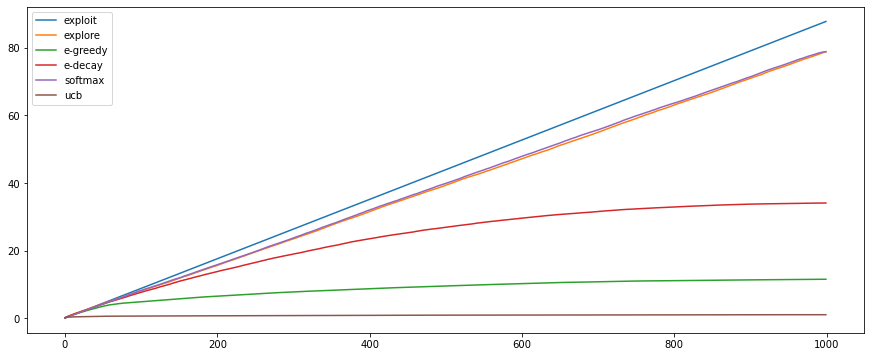

In [180]:

EPISODES=1000
R_exploit = np.zeros(EPISODES)
R_explore = np.zeros(EPISODES)
R_epsilon = np.zeros(EPISODES)
R_epsdecay = np.zeros(EPISODES)
R_soft = np.zeros(EPISODES)
R_ucb = np.zeros(EPISODES)
for i in range(50):
    R_exploit += regret([1-bb_envs[i].alpha, bb_envs[i].beta] ,PureExploitation(bb_envs[i],EPISODES)[1])
    R_explore +=  regret([1-bb_envs[i].alpha, bb_envs[i].beta] ,PureExploration(bb_envs[i],EPISODES)[1])
    R_epsilon +=  regret([1-bb_envs[i].alpha, bb_envs[i].beta] ,EpsilonGreedy(bb_envs[i],EPISODES)[1])
    R_epsdecay +=  regret([1-bb_envs[i].alpha, bb_envs[i].beta] ,EpsilonDecay(bb_envs[i],EPISODES)[1])
    R_soft +=  regret([1-bb_envs[i].alpha, bb_envs[i].beta] ,SoftmaxStrategy(bb_envs[i],EPISODES)[1])
    R_ucb +=  regret([1-bb_envs[i].alpha, bb_envs[i].beta] ,UCB(bb_envs[i],EPISODES)[1])
R_exploit /= 50
R_explore /= 50
R_epsilon /= 50
R_epsdecay /= 50
R_soft /= 50
R_ucb /= 50
plt.plot(R_exploit)
plt.plot(R_explore)
plt.plot(R_epsilon)
plt.plot(R_epsdecay)
plt.plot(R_soft)
plt.plot(R_ucb)
plt.legend(['exploit','explore','e-greedy', 'e-decay','softmax', 'ucb'])


#### gaussian bandits

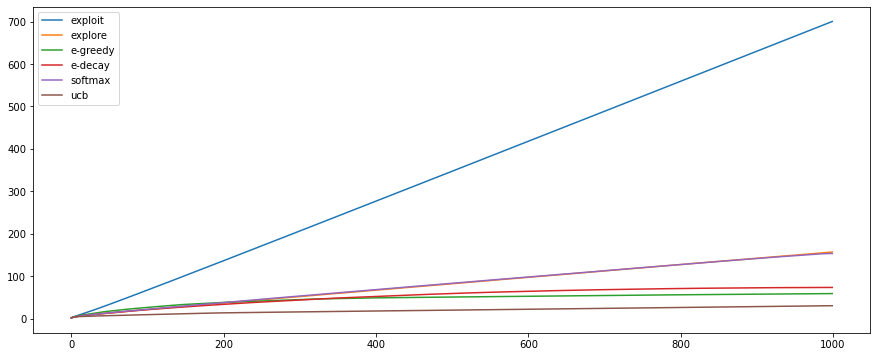

In [181]:

EPISODES=1000
R_exploit = np.zeros(EPISODES)
R_explore = np.zeros(EPISODES)
R_epsilon = np.zeros(EPISODES)
R_epsdecay = np.zeros(EPISODES)
R_soft = np.zeros(EPISODES)
R_ucb = np.zeros(EPISODES)
for i in range(50):
    R_exploit += regret(gb_envs[i].rewards ,PureExploitation(gb_envs[i],EPISODES)[1])
    R_explore +=  regret(gb_envs[i].rewards ,PureExploration(gb_envs[i],EPISODES)[1])
    R_epsilon +=  regret(gb_envs[i].rewards ,EpsilonGreedy(gb_envs[i],EPISODES)[1])
    R_epsdecay +=  regret(gb_envs[i].rewards ,EpsilonDecay(gb_envs[i],EPISODES)[1])
    R_soft +=  regret(gb_envs[i].rewards ,SoftmaxStrategy(gb_envs[i],EPISODES)[1])
    R_ucb +=  regret(gb_envs[i].rewards ,UCB(gb_envs[i],EPISODES)[1])
R_exploit /= 50
R_explore /= 50
R_epsilon /= 50
R_epsdecay /= 50
R_soft /= 50
R_ucb /= 50
plt.plot(R_exploit)
plt.plot(R_explore)
plt.plot(R_epsilon)
plt.plot(R_epsdecay)
plt.plot(R_soft)
plt.plot(R_ucb)
plt.legend(['exploit','explore','e-greedy', 'e-decay','softmax', 'ucb'])


## % Optimal Action

In [182]:

def optimal_action(values, actions):
  best_action = np.argmax(values)
  percent = np.zeros(len(actions))
  count = 0
  for i in range(len(actions)):
    if actions[i]==best_action : count +=1
    percent[i] = count/(i+1)
  return percent


#### bernoulli bandits

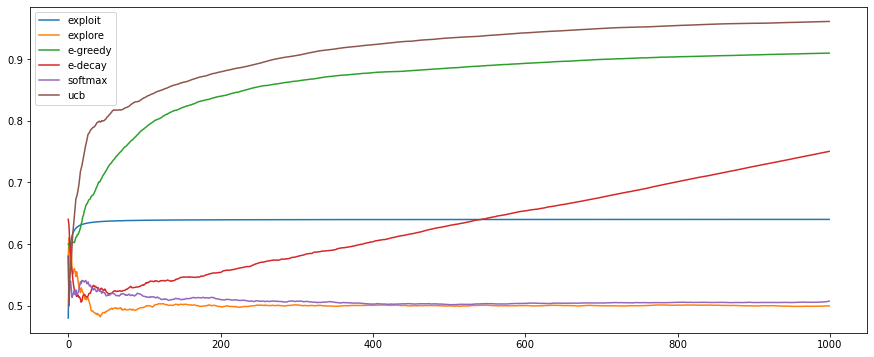

In [184]:
EPISODES=1000
R_exploit = np.zeros(EPISODES)
R_explore = np.zeros(EPISODES)
R_epsilon = np.zeros(EPISODES)
R_epsdecay = np.zeros(EPISODES)
R_soft = np.zeros(EPISODES)
R_ucb = np.zeros(EPISODES)
for i in range(50):
    R_exploit += optimal_action([1-bb_envs[i].alpha, bb_envs[i].beta] ,PureExploitation(bb_envs[i],EPISODES)[1])
    R_explore +=  optimal_action([1-bb_envs[i].alpha, bb_envs[i].beta] ,PureExploration(bb_envs[i],EPISODES)[1])
    R_epsilon +=  optimal_action([1-bb_envs[i].alpha, bb_envs[i].beta] ,EpsilonGreedy(bb_envs[i],EPISODES)[1])
    R_epsdecay +=  optimal_action([1-bb_envs[i].alpha, bb_envs[i].beta] ,EpsilonDecay(bb_envs[i],EPISODES)[1])
    R_soft +=  optimal_action([1-bb_envs[i].alpha, bb_envs[i].beta] ,SoftmaxStrategy(bb_envs[i],EPISODES)[1])
    R_ucb +=  optimal_action([1-bb_envs[i].alpha, bb_envs[i].beta] ,UCB(bb_envs[i],EPISODES)[1])
R_exploit /= 50
R_explore /= 50
R_epsilon /= 50
R_epsdecay /= 50
R_soft /= 50
R_ucb /= 50
plt.plot(R_exploit)
plt.plot(R_explore)
plt.plot(R_epsilon)
plt.plot(R_epsdecay)
plt.plot(R_soft)
plt.plot(R_ucb)
plt.legend(['exploit','explore','e-greedy', 'e-decay','softmax', 'ucb'])

#### gaussian bandits

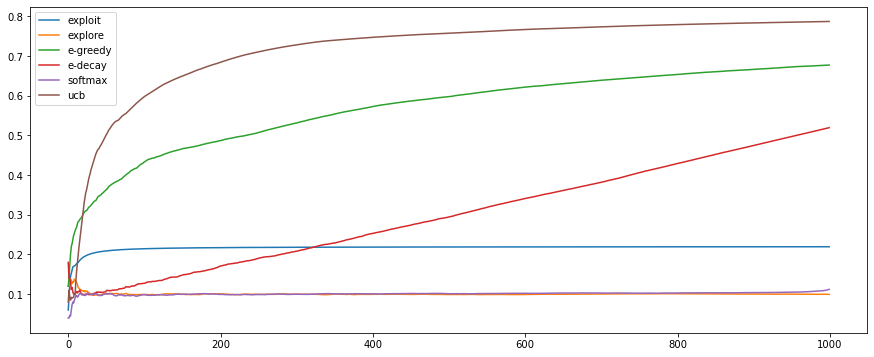

In [185]:

EPISODES=1000
R_exploit = np.zeros(EPISODES)
R_explore = np.zeros(EPISODES)
R_epsilon = np.zeros(EPISODES)
R_epsdecay = np.zeros(EPISODES)
R_soft = np.zeros(EPISODES)
R_ucb = np.zeros(EPISODES)
for i in range(50):
    R_exploit += optimal_action(gb_envs[i].rewards ,PureExploitation(gb_envs[i],EPISODES)[1])
    R_explore +=  optimal_action(gb_envs[i].rewards ,PureExploration(gb_envs[i],EPISODES)[1])
    R_epsilon +=  optimal_action(gb_envs[i].rewards ,EpsilonGreedy(gb_envs[i],EPISODES)[1])
    R_epsdecay +=  optimal_action(gb_envs[i].rewards ,EpsilonDecay(gb_envs[i],EPISODES)[1])
    R_soft +=  optimal_action(gb_envs[i].rewards ,SoftmaxStrategy(gb_envs[i],EPISODES)[1])
    R_ucb +=  optimal_action(gb_envs[i].rewards ,UCB(gb_envs[i],EPISODES)[1])
R_exploit /= 50
R_explore /= 50
R_epsilon /= 50
R_epsdecay /= 50
R_soft /= 50
R_ucb /= 50
plt.plot(R_exploit)
plt.plot(R_explore)
plt.plot(R_epsilon)
plt.plot(R_epsdecay)
plt.plot(R_soft)
plt.plot(R_ucb)
plt.legend(['exploit','explore','e-greedy', 'e-decay','softmax', 'ucb'])
